<a href="https://colab.research.google.com/github/mooochiiii/exercise/blob/main/d%E1%BB%B1_%C4%91o%C3%A1n_gi%C3%A1_c%E1%BB%95_phi%E1%BA%BFu_c%C3%B4ng_ty_Meta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
import pandas_datareader.data as pdr
from datetime import datetime
plt.style.use('bmh')
# from keras.models import Sequential
# from keras.layers import Dense,LSTM,Dropout
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

**Đọc dữ liệu**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load csv
data = pd.read_csv('/content/drive/MyDrive/META.csv', parse_dates=['Date'])
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2901,2023-11-29,339.690002,339.899994,330.779999,332.200012,332.200012,16024500
2902,2023-11-30,331.890015,333.500000,322.399994,327.149994,327.149994,23146400
2903,2023-12-01,325.480011,326.859985,320.760010,324.820007,324.820007,15264700
2904,2023-12-04,317.290009,320.859985,313.660004,320.019989,320.019989,19037100


In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2906 non-null   datetime64[ns]
 1   Open       2906 non-null   float64       
 2   High       2906 non-null   float64       
 3   Low        2906 non-null   float64       
 4   Close      2906 non-null   float64       
 5   Adj Close  2906 non-null   float64       
 6   Volume     2906 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 159.0 KB


dữ liệu huấn luyện chỉ lấy từ 01-01-2016 đến 01-01-2021

dữ liệu kiểm thử lấy từ 01-01-2021- 30-12-2022


**Chọn dữ liệu huấn luyện**

In [ ]:
# Load data
yf.pdr_override()
start_date = "01-01-2016"
end_date = "01-01-2021"
company = "Meta"
start = datetime.strptime(start_date, "%d-%m-%Y")
end = datetime.strptime(end_date, "%d-%m-%Y")
df = pdr.get_data_yahoo(company, start=start, end=end)
df.round()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,102.0,102.0,100.0,102.0,102.0,37912400
2016-01-05,103.0,104.0,102.0,103.0,103.0,23258200
2016-01-06,101.0,104.0,101.0,103.0,103.0,25096200
2016-01-07,100.0,101.0,97.0,98.0,98.0,45172900
2016-01-08,100.0,100.0,97.0,97.0,97.0,35402300
...,...,...,...,...,...,...
2020-12-24,269.0,270.0,266.0,267.0,267.0,6702000
2020-12-28,269.0,277.0,266.0,277.0,277.0,23299700
2020-12-29,277.0,281.0,276.0,277.0,277.0,16383000


Trực quan hóa dữ liệu

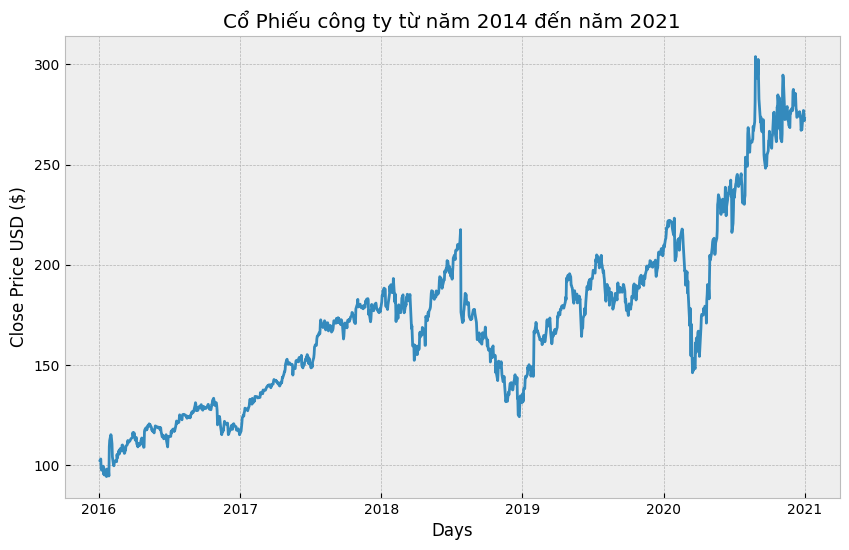

In [ ]:
data= df.filter(['Close'])
plt.figure(figsize=(10,6))
plt.title('Cổ Phiếu công ty Meta từ năm 2014 đến năm 2021')
plt.xlabel('Days')
plt.ylabel("Close Price USD ($)")
plt.plot(data['Close'])
plt.show()

**Chuẩn hóa dữ liệu**

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
prediction_days=60
x_train = []
y_train = []
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

**Model LSTM sử dụng thuật toán tối ưu adam**

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=100, batch_size=32)
model.save("/content/drive/MyDrive/New folder/model/stock3.15")

Epoch 1/100
38/38 [==============================] - 17s 198ms/step - loss: 0.0222
Epoch 2/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0058
Epoch 3/100
38/38 [==============================] - 7s 182ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 8s 202ms/step - loss: 0.0037
Epoch 7/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 7s 178ms/step - loss: 0.0041
Epoch 9/100
38/38 [==============================] - 6s 158ms/step - loss: 0.0037
Epoch 10/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 8s 204ms/step - loss: 0.0037
Epoch 12/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0036
Epoch 13/100

**Kiểm thử model**

In [ ]:
# Tạo mảng dữ liệu thử nghiệm
x_test = []
for x in range(prediction_days, len(inputs)):
    x_test.append(inputs[x-prediction_days:x, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
model = keras.models.load_model('/content/drive/MyDrive/New folder/model/stock3.15')
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
y_pred=predicted_prices/prediction_days
y_test=actual_prices/prediction_days

8/8 [==============================] - 2s 44ms/step


**đây là tập dữ liệu kiểm thử**

[*********************100%%**********************]  1 of 1 completed


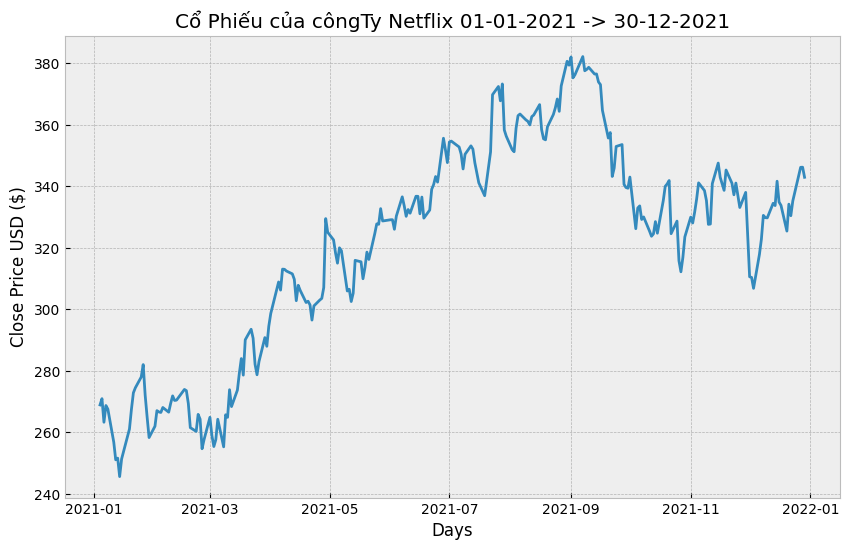

In [ ]:
#Load the test data
yf.pdr_override()
start_date = "01-01-2021"
end_date = "30-12-2021"
start = datetime.strptime(start_date, "%d-%m-%Y")
end = datetime.strptime(end_date, "%d-%m-%Y")
test_data = pdr.get_data_yahoo(company, start=start, end=end)
actual_prices = test_data["Close"].values
total_dataset = pd.concat((data["Close"], test_data["Close"]), axis=0)
inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.fit_transform(inputs)
plt.figure(figsize=(10, 6))
plt.title('Cổ Phiếu của côngTy Netflix 01-01-2021 -> 30-12-2021')
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(test_data["Close"])
plt.show()

**Khởi tạo vector dự đoán**

In [ ]:
# Tạo mảng dữ liệu thử nghiệm
x_test = []
for x in range(prediction_days, len(inputs)):
    x_test.append(inputs[x-prediction_days:x, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
model = keras.models.load_model('/content/drive/MyDrive/New folder/model/stock3.15')
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
y_pred=predicted_prices/prediction_days
y_test=actual_prices/prediction_days

8/8 [==============================] - 2s 34ms/step


**giá trị hàm mất mát tối ưu và hiệu suất mô hình**

In [ ]:
from sklearn.metrics import r2_score
mse = mean_squared_error(y_pred, y_test)
print("sử dụng adam để dự tối ưu hàm mất mát la:", mse)
rmse= math.sqrt(mse)
print("Root Mean Squared Error của adam là:", rmse)
r2 = r2_score(y_test, y_pred)
print("R2 score đây là độ chính sác của mô hình:", r2)

sử dụng adam để dự tối ưu hàm mất mát la: 0.013918593097413336
Root Mean Squared Error của adam là: 0.1179770871712526
R2 score đây là độ chính sác của mô hình: 0.9588126887635184


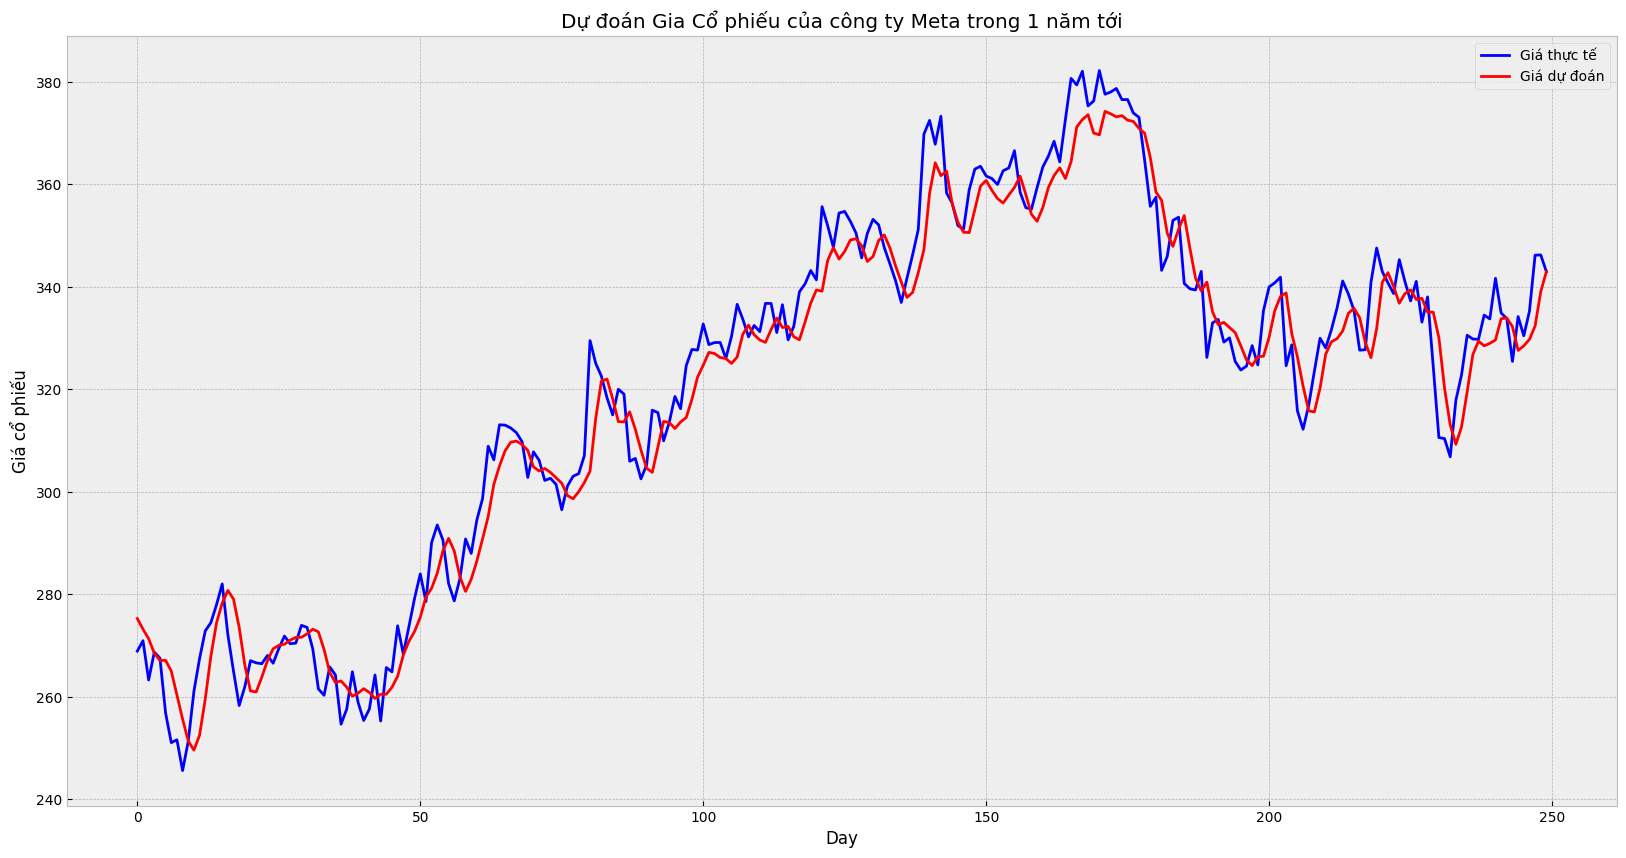

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Dự đoán Gia Cổ phiếu của công ty Meta trong 1 năm tới')
plt.xlabel('Day')
plt.ylabel('Giá cổ phiếu')
plt.plot(actual_prices, color="blue")
plt.plot(predicted_prices, color="red")
plt.legend(['Giá thực tế', 'Giá dự đoán'])
plt.show()

**Model LSTM sử dụng thuật toán tối ưu SGD**

In [ ]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='sgd', loss='mae')
model.fit(x_train, y_train, epochs=100, batch_size=32)
# saving the model
model.save("/content/drive/MyDrive/New folder/model/stock5.20")

Epoch 1/100
38/38 [==============================] - 17s 167ms/step - loss: 0.1740
Epoch 2/100
38/38 [==============================] - 9s 236ms/step - loss: 0.1395
Epoch 3/100
38/38 [==============================] - 5s 143ms/step - loss: 0.1297
Epoch 4/100
38/38 [==============================] - 8s 219ms/step - loss: 0.1085
Epoch 5/100
38/38 [==============================] - 9s 248ms/step - loss: 0.0741
Epoch 6/100
38/38 [==============================] - 7s 172ms/step - loss: 0.0627
Epoch 7/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0587
Epoch 8/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0595
Epoch 9/100
38/38 [==============================] - 8s 202ms/step - loss: 0.0573
Epoch 10/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0555
Epoch 11/100
38/38 [==============================] - 7s 173ms/step - loss: 0.0563
Epoch 12/100
38/38 [==============================] - 6s 165ms/step - loss: 0.0542
Epoch 13/100

In [ ]:
# Tạo mảng dữ liệu thử nghiệm
x_test = []
for x in range(prediction_days, len(inputs)):
    x_test.append(inputs[x-prediction_days:x, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
model = keras.models.load_model('/content/drive/MyDrive/New folder/model/stock5.20')
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
y_pred = predicted_prices/prediction_days


8/8 [==============================] - 3s 45ms/step



**Gía trị mất mát tối ưu và Hiệu suất mô hình của SGD**

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("sử dụng thuật toán SGD để tối ưu hàm mất mát :", mse)
rmse= math.sqrt(mse)
print("Root Mean Squared Error của SGD:", rmse)
r2 = r2_score(y_test, y_pred)
print("R2 score đây là độ chính sác của mô hình:", r2)

sử dụng thuật toán SGD để tối ưu hàm mất mát : 0.05520608632669282
Root Mean Squared Error của SGD: 0.23495975469576236
R2 score đây là độ chính sác của mô hình: 0.8366364873395047


**Đồ thị so sanh**

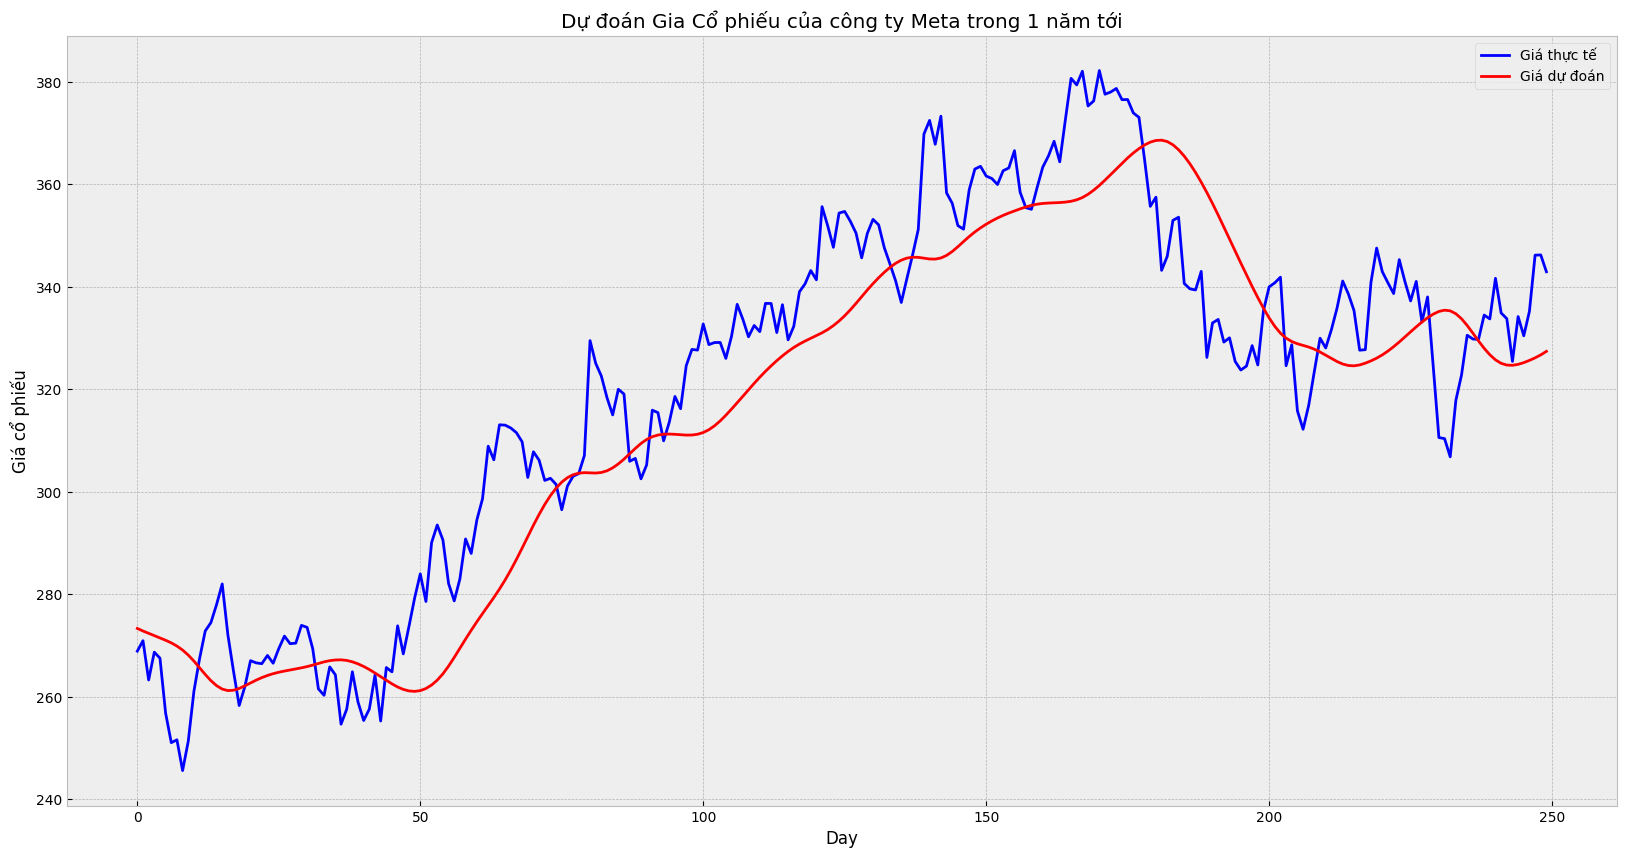

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Dự đoán Gia Cổ phiếu của công ty Meta trong 1 năm tới')
plt.xlabel('Day')
plt.ylabel('Giá cổ phiếu')
plt.plot(actual_prices, color="blue")
plt.plot(predicted_prices, color="red")
plt.legend(['Giá thực tế', 'Giá dự đoán'])
plt.show()